In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tiktok = pd.read_csv("../data/raw/tiktok.csv")


In [3]:
#EDA
tiktok.head()
tiktok.shape
tiktok.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
tiktok['claim_status'].value_counts()
tiktok['verified_status'].value_counts()
tiktok['author_ban_status'].value_counts()


author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64

In [5]:
tiktok.isnull().sum()



#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [7]:
tiktok.duplicated(subset='video_id').sum()
tiktok.drop_duplicates(subset='video_id', inplace=True)


In [8]:
tiktok = tiktok[tiktok['video_duration_sec'] > 0]


In [9]:
tiktok = tiktok[tiktok['video_view_count'] >= tiktok['video_like_count']]


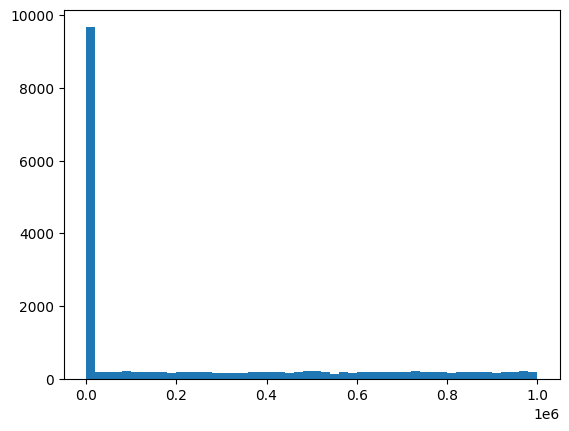

In [10]:
#VISUALISATIONS
plt.hist(tiktok['video_view_count'], bins=50)
plt.show()


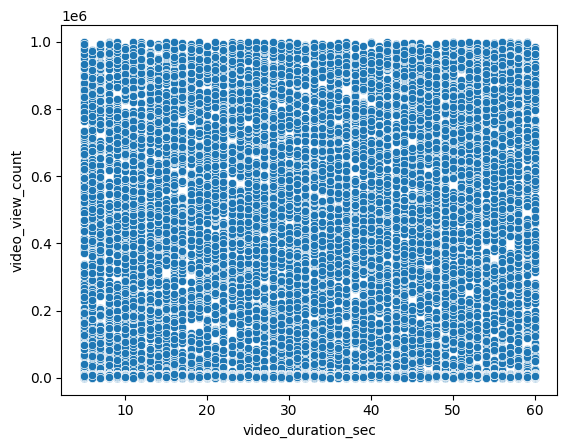

In [11]:
sns.scatterplot(
    x='video_duration_sec',
    y='video_view_count',
    data=tiktok
)
plt.show()


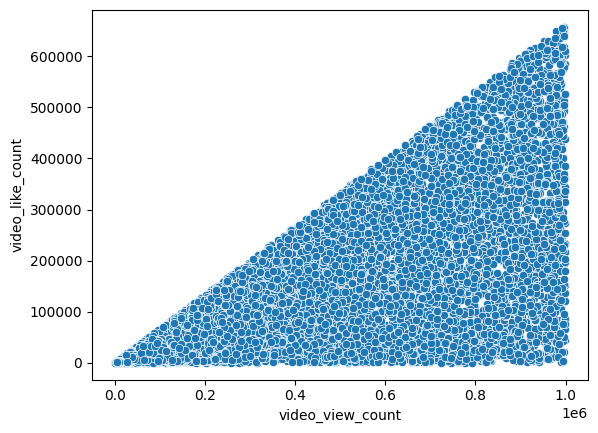

In [12]:
sns.scatterplot(
    x='video_view_count',
    y='video_like_count',
    data=tiktok
)
plt.show()


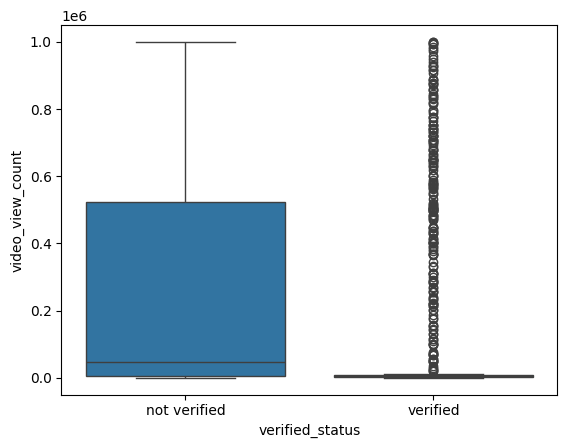

In [13]:
sns.boxplot(
    x='verified_status',
    y='video_view_count',
    data=tiktok
)
plt.show()


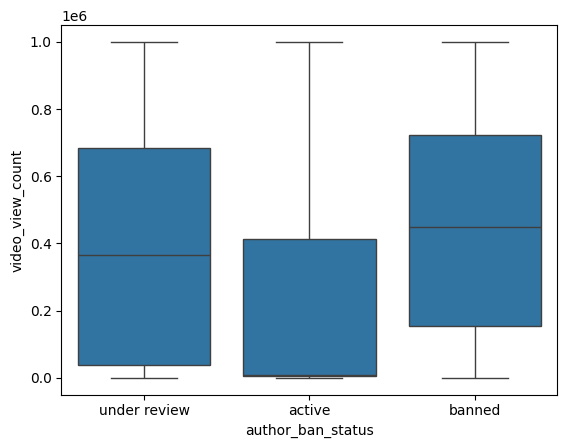

In [14]:
sns.boxplot(
    x='author_ban_status',
    y='video_view_count',
    data=tiktok
)
plt.show()


In [15]:
#DATA ENGINEERING
interaction_cols = [
    'video_like_count',
    'video_share_count',
    'video_comment_count',
    'video_download_count'
]

tiktok[interaction_cols].describe()


,video_like_count,video_share_count,video_comment_count,video_download_count
count,19084.000000,19084.000000,19084.000000,19084.000000
mean,84304.636030,16735.248323,349.312146,1049.429627
std,133420.546814,32036.174350,799.638865,2004.299894
min,0.000000,0.000000,0.000000,0.000000
25%,810.750000,115.000000,1.000000,7.000000
50%,3403.500000,717.000000,9.000000,46.000000
75%,125020.000000,18222.000000,292.000000,1156.250000
max,657830.000000,256130.000000,9599.000000,14994.000000


In [16]:
#CLEANED EDA DATA
tiktok.to_csv("../data/cleaned/tiktok_cleaned.csv", index=False)


In [3]:
tiktok = tiktok.copy()


In [4]:
tiktok['engagement_rate'] = (
    tiktok['video_like_count'] +
    tiktok['video_comment_count'] +
    tiktok['video_share_count']
) / tiktok['video_view_count']

tiktok['engagement_rate'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\1463040136.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiktok['engagement_rate'].fillna(0, inplace=True)


In [6]:
tiktok['interaction_intensity'] = (
    tiktok['video_comment_count'] +
    tiktok['video_share_count'] +
    tiktok['video_download_count']
) / tiktok['video_like_count'].replace(0, 1)


In [7]:
tiktok['views_per_second'] = (
    tiktok['video_view_count'] / tiktok['video_duration_sec']
)

tiktok['views_per_second'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\2426991394.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiktok['views_per_second'].fillna(0, inplace=True)


In [8]:
tiktok['short_video_flag'] = (
    tiktok['video_duration_sec'] <= 30
).astype(int)


In [9]:
tiktok['verified_flag'] = (
    tiktok['verified_status'] == 'verified'
).astype(int)


In [10]:
tiktok['ban_flag'] = (
    tiktok['author_ban_status'] == 'banned'
).astype(int)


In [11]:
tiktok['transcript_length'] = (
    tiktok['video_transcription_text'].str.len()
)

tiktok['transcript_length'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\4211412946.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiktok['transcript_length'].fillna(0, inplace=True)


In [12]:
tiktok[['engagement_rate','verified_flag','ban_flag']].describe()


,engagement_rate,verified_flag,ban_flag
count,19382.000000,19382.000000,19382.000000
mean,0.326803,0.063977,0.084563
std,0.213354,0.244718,0.278237
min,0.000000,0.000000,0.000000
25%,0.148570,0.000000,0.000000
50%,0.309633,0.000000,0.000000
75%,0.472489,0.000000,0.000000
max,0.932741,1.000000,1.000000


In [13]:
#STORED ENGINEERED DATA
tiktok.to_csv("../data/cleaned/tiktok_features.csv", index=False)


MACHINE LEARNING Classification / Regression
Predict high engagement

In [17]:
import pandas as pd
import numpy as np

tiktok = pd.read_csv("../data/cleaned/tiktok_features.csv")


In [18]:
threshold = tiktok['engagement_rate'].median()

tiktok['high_engagement'] = (
    tiktok['engagement_rate'] >= threshold
).astype(int)


In [19]:
tiktok['high_engagement'].value_counts()


high_engagement
0    9691
1    9691
Name: count, dtype: int64

In [20]:
features = [
    'views_per_second',
    'interaction_intensity',
    'short_video_flag',
    'verified_flag',
    'ban_flag'
]

X = tiktok[features]
y = tiktok['high_engagement']


In [21]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\2899113324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\2899113324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [22]:
X.isna().sum()


views_per_second         0
interaction_intensity    0
short_video_flag         0
verified_flag            0
ban_flag                 0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [24]:
from sklearn.ensemble import RandomForestClassifier

model_tiktok = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model_tiktok.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import classification_report

y_pred = model_tiktok.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.53      0.53      1939
           1       0.54      0.56      0.55      1938

    accuracy                           0.54      3877
   macro avg       0.54      0.54      0.54      3877
weighted avg       0.54      0.54      0.54      3877



In [26]:
y_prob = model_tiktok.predict_proba(X_test)[:, 1]


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

tiktok = pd.read_csv("../data/cleaned/tiktok_features.csv")

threshold = tiktok['engagement_rate'].median()
tiktok['high_engagement'] = (tiktok['engagement_rate'] >= threshold).astype(int)

features = [
    'views_per_second',
    'interaction_intensity',
    'short_video_flag',
    'verified_flag',
    'ban_flag'
]

X = tiktok[features]
y = tiktok['high_engagement']

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model_tiktok = RandomForestClassifier(n_estimators=100, random_state=42)
model_tiktok.fit(X_train, y_train)

# SAVE MODEL
joblib.dump(model_tiktok, "../models/tiktok_model.pkl")


C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\58323734.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\adhit\AppData\Local\Temp\ipykernel_17792\58323734.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


['../models/tiktok_model.pkl']